# Exercise 1
## Exercise 1.1
### Average value

We start by loading the output from the exercise1_1.cpp program, it containes, in three columns, the block number, the progressive average and the prograssive error. 
Before importing we import the required libraries for plotting and analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

As explained above we import the file, assigning each column to a numpy array

In [2]:
x, avg, err_avg = np.loadtxt("out1_1.txt", unpack = True)

We now plot $\langle r \rangle - \frac{1}{2}$ vs. the number of blocks with errorbars (all from the data generated by the c++ code)

Text(0.5, 1.0, 'Plot of the estimated average')

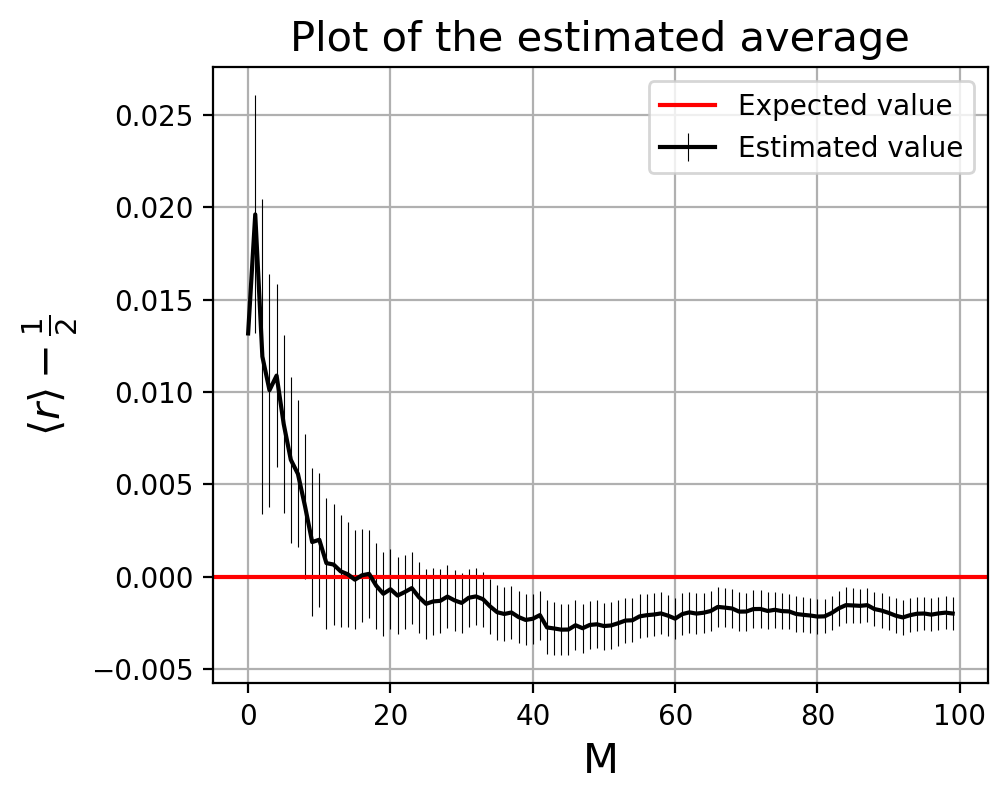

In [3]:
plt.figure(figsize = (5,4), dpi = 200)
plt.errorbar(x, avg - 0.5, err_avg, label = "Estimated value", color = "black", elinewidth = 0.4)
plt.axhline(0, color = "red", label = "Expected value")
plt.ylabel(r'$\langle r \rangle - \frac{1}{2}$', fontsize = 15)
plt.xlabel("M", fontsize = 15)
plt.legend()
plt.grid()
plt.title("Plot of the estimated average", fontsize = 15)

## Exercise 1.2
### Testing Variance

We now import the file containing the estimate for $\sigma^2$, as the previous one it contains three columns with block, estimate for the variance and error.
From the variance its expected value $\left(\frac{1}{12}\right)$ has already been subtracted.

In [4]:
x, var, err_var = np.loadtxt("out1_2.txt", unpack = True)

Text(0.5, 1.0, 'Plot of the estimated variance')

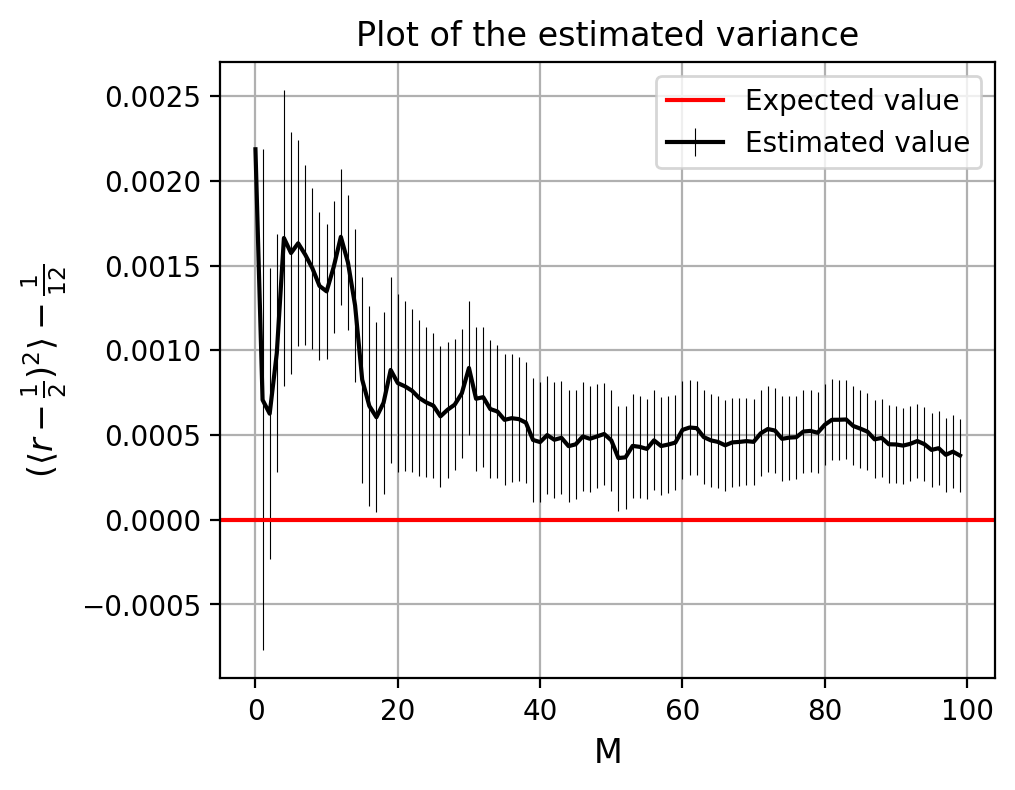

In [5]:
plt.figure(figsize = (5,4), dpi = 200)
plt.errorbar(x, var, err_var, label = "Estimated value", color = "black", elinewidth = 0.4)
plt.axhline(0, color = "red", label = "Expected value")
plt.legend()
plt.grid()
plt.ylabel(r'$(\langle r - \frac{1}{2} )^2\rangle - \frac{1}{12}$', fontsize = 12)
plt.xlabel("M", fontsize = 12)
plt.title("Plot of the estimated variance")

## Exercise 3.1

This exercise involves estimating $\pi$ using the Buffon experiment

In [6]:
x, pi_est, pi_err = np.loadtxt("out_pi.txt", unpack = True)

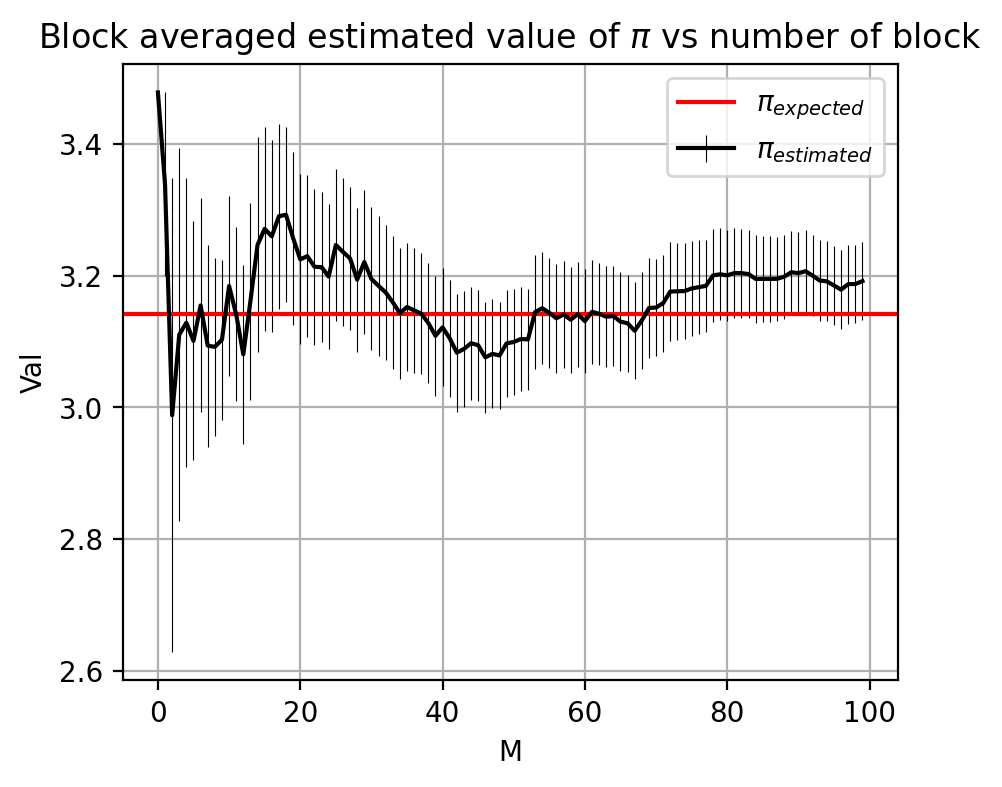

In [7]:
plt.figure(figsize = (5,4), dpi = 200)
plt.errorbar(x, pi_est, pi_err, label = r"$\pi_{estimated}$", color = "black", elinewidth = 0.4)
plt.axhline(np.pi, color = "red", label = r"$\pi_{expected}$")
plt.grid()
plt.xlabel("M")
plt.ylabel("Val")
plt.title(r"Block averaged estimated value of $\pi$ vs number of block")
plt.legend()